# EECE 7150: HW 1 -  Stationary Distribution of a Markov Chain

In [13]:
import random
from collections import Counter
import numpy as np
import time
import matplotlib.pyplot as plt

## Part-1: Write up a general purpose simulator for the state transition matrix.

In [14]:
# Define the class for generating random weather sequence and calculate the stationary distribution
class WeatherSimulator:

    # Initializes the WeatherSimulator with states and transition probabilities.
    def __init__(self):
       
        # Define the possible weather states
        self.states = ["sunny", "cloudy", "rainy"]
        
        # Define the transition matrix as a dictionary
        self.transition_matrix = {
            "sunny": [0.8, 0.2, 0.0],  
            "cloudy": [0.4, 0.4, 0.2], 
            "rainy": [0.2, 0.6, 0.2]
        }
    
    # Determines the next state based on the current state using the transition matrix.
    def next_state(self, current_state):
 
        # Use random.choices to select the next state based on the transition probabilities
        return random.choices(self.states, weights=self.transition_matrix[current_state])[0]

    # Generates a sequence of weather states starting from an initial state.
    def generate_sequence(self, initial_state, num_days):
        
        # Initialize the sequence with the initial state
        sequence = [initial_state]
        current_state = initial_state
        
        # Iterate for the remaining number of days
        for _ in range(num_days - 1):
            current_state = self.next_state(current_state)
            sequence.append(current_state)
        
        return sequence

    # Estimates the stationary distribution by running multiple simulations.
    def calculate_stationary_distribution(self, initial_state, num_days, num_runs):
        all_states = []
        # Generate a sequence for each simulation and add to the state list
        for _ in range(num_runs):
            all_states.extend(self.generate_sequence(initial_state, num_days))

        # Calculate the total number of states
        counts = Counter(all_states)
        total = sum(counts.values())

        # Return the stationary distribution as a dictionary of probabilities
        return {state: count / total for state, count in counts.items()}
        
    # Plots the convergence of weather state probabilities over time.
    def plot_convergence(self, initial_state, num_days, num_runs):
        probabilities = {state: [0] * (num_days + 1) for state in self.states}

        # Run simulations
        for _ in range(num_runs):
            simulation = self.generate_sequence(initial_state, num_days)
            for day, state in enumerate(simulation):
                probabilities[state][day + 1] += 1

        # Normalize the counts to get the probabilities for each state at each day
        for state in self.states:
            for day in range(1, num_days + 1):
                probabilities[state][day] /= num_runs
        
        # Plot the probability curves for each state over the days 
        plt.figure(figsize=(12, 6))
        for state in self.states:
            plt.plot(range(num_days + 1), probabilities[state], label=state)

        # Plot labelling
        plt.xlabel('Number of Days')
        plt.ylabel('Probability')
        plt.title(f'Convergence of Weather State Probabilities over {num_days} days')
        plt.legend()
        plt.grid(True)
        plt.ylim(0, 1)  # Set y-axis limits from 0 to 1
        plt.show()


In [17]:
# Run the simulator
simulator = WeatherSimulator() 

# Select a random starting weather state (sunny, cloudy, or rainy)
initial_weather = random.choice(simulator.states)
num_days = 10  # Simulate weather for 10 days

# Generate a sequence of weather states based on the initial state
weather_sequence = simulator.generate_sequence(initial_weather, num_days)

# Print the simulated weather sequence
print(f"Weather sequence for {num_days} days:")
print(" -> ".join(weather_sequence))  # Print the sequence in a readable format

Weather sequence for 10 days:
sunny -> sunny -> cloudy -> sunny -> cloudy -> cloudy -> rainy -> cloudy -> sunny -> sunny


## Part-2: Use your simulator to determine the stationary distribution of this Markov chain. 

Simulation took 22.77 seconds

Estimated Stationary Distribution:
sunny: 0.649110
cloudy: 0.281428
rainy: 0.069462


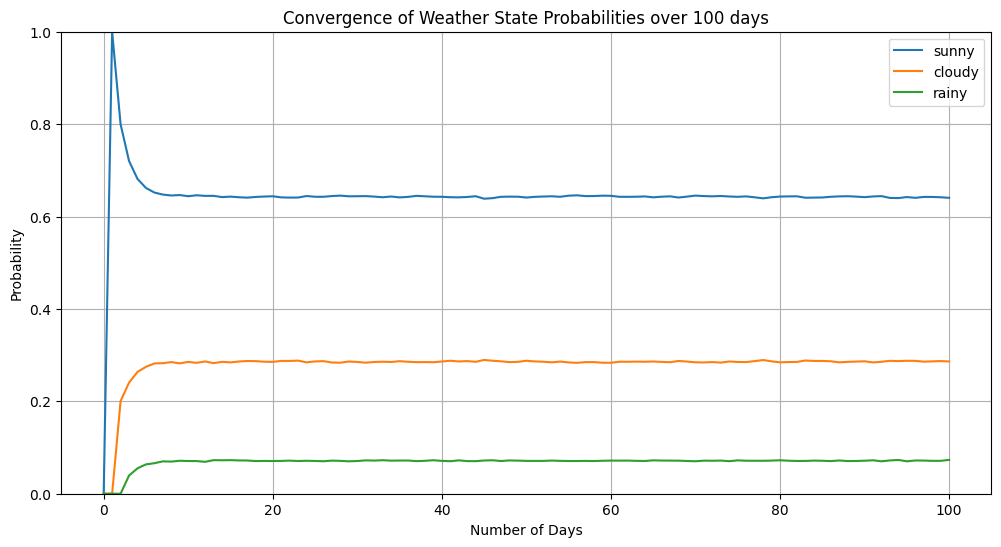

In [18]:
# Define the number of transitions and the number of simulations to perform
num_transitions = 100  
num_simulations = 100000  

# Start measuring time to track how long the simulation takes
start_time = time.time()

# Calculate the stationary distribution through simulation
stationary_distribution = simulator.calculate_stationary_distribution(initial_weather, num_transitions, num_simulations)

# End the time measurement and print the time taken
end_time = time.time()
print(f"Simulation took {end_time - start_time:.2f} seconds")

# Print the estimated stationary distribution
print("\nEstimated Stationary Distribution:")
for state, probability in stationary_distribution.items():
    print(f"{state}: {probability:.6f}")

# Plot convergence
simulator.plot_convergence(initial_weather, num_transitions, num_simulations)

#### (i) How we initialize the simulation:

In this code, I have initialized the simulation with a randomly chosen initial state. This random initialization helps to avoid any bias that might come from always starting in the same state. 

#### (ii) How many transitions we consider before taking a result:

Before taking in a result, I have considered 100 transitions. This corresponds to the number of days for which we are simulating the weather. This means that for each simulation run, we allow the Markov chain to evolve for 100 steps before recording the final state. By taking this amount of transitions, helps us to minimize the effect of the initial state on the stationary behaviour of the given Markov Chain. 

#### (iii) How many simulation runs we conducted:

I have used a variable num_simulations set to 1,00,000. This is the number of simulation runs conducted to estimate the stationary distribution of the Markov Chain. This means we repeat the process of evolving the chain for 100 steps and recording the final state 1,00,000 times. These large number of simulation runs help to reduce random fluctuations and give us a more accurate estimate of the true stationary distribution.

#### Convergence:

From the graph, we can see that the results converge to the statinoary distribution values as we keep on increasing the number of days, i.e., the number of transitions before taking a result. The estimated values match with the analytical solution. Ideally, we should have kept on increasing the number of transitions so that we could get the exact value of the stationary distribution. However, doing this significantly increases the computation time. So, we stuck with 100 transitions and 1,00,000 simulations. 

## Part-3: Implement a closed-form solution to calculate the stationary distribution of the Markov Chain by diagonalization of the state transition matrix.

In [9]:
def compute_stationary_distribution(A, states):
    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(A.T)

    # Find the index of the eigenvalue closest to 1
    index_of_one = np.argmin(np.abs(eigenvalues - 1))

    # The corresponding eigenvector is the stationary distribution
    stationary_distribution = eigenvectors[:, index_of_one].real

    # Normalize the eigenvector
    stationary_distribution = stationary_distribution / np.sum(stationary_distribution)

    # Print the result
    print("Analytical Stationary Distribution:")
    for state, probability in zip(states, stationary_distribution):
        print(f"{state}: {probability:.6f}")

    # Verify that this is indeed a left eigenvector of A with eigenvalue 1
    print("\nVerification:")
    print("π * A =", np.dot(stationary_distribution, A))
    print("π =   ", stationary_distribution)
    
    return stationary_distribution

In [11]:
# Transition matrix and states definition
A = np.array([
    [0.8, 0.2, 0.0],
    [0.4, 0.4, 0.2],
    [0.2, 0.6, 0.2]
])

states = ["sunny", "cloudy", "rainy"]

# Function call
stationary_distribution = compute_stationary_distribution(A, states)

Analytical Stationary Distribution:
sunny: 0.642857
cloudy: 0.285714
rainy: 0.071429

Verification:
π * A = [0.64285714 0.28571429 0.07142857]
π =    [0.64285714 0.28571429 0.07142857]


#### Analytical solution of stationary distribution

Here, I have calculated the stationary distribution of the Markov chain using the transition matrix A. The stationary distribution π satisfies this equation:

\begin{equation*}
\pi A=\pi
\end{equation*}

The stationary distribution is a left eigenvector of the matrix A corresponding to the eigenvalue 1:

\begin{equation*}
A^{T}v = \lambda v
\end{equation*}

The eigenvalues and eigenvectors of $𝐴^T$ are calculated. The eigenvector associated with the eigenvalue closest to 1 is selected. The eigenvector is normalized so that the elements sum to 1, ensuring it represents probabilities:

$$\pi = \frac{v}{\sum v}$$

The left product $\pi A$ is checked to confirm it equals $\pi$.
